In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import time

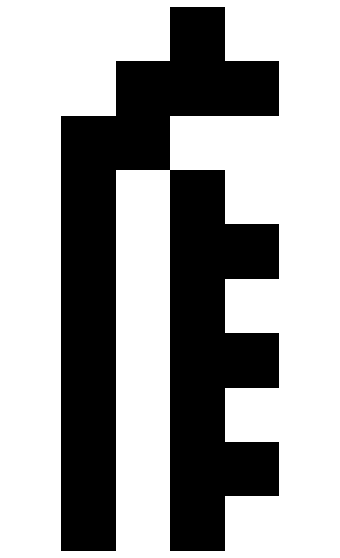

In [2]:
class AC(): # Clase de automatas celulares
    def __init__(self, regla, num_ac, tiempo, cond_init = 'normal', color = 'Greys'):
        #parametros, regla de Wolfram, numero de autómatas, pasos discreto en el tiempo,
        # condición inicial, color el usuario puede cambiar el color de las autómatas si lo desea
        self.regla = bin(regla)[2:].zfill(8) #Coloco la regla en binario
        self.cond_init = cond_init 
        self.tiempo = tiempo
        self.N = num_ac
        self.color = color
        
        if self.cond_init == 'normal': # Si la condicion es la normal, tendra una celda inicial con el estado 1, las demás estarán en cero
            self.cells = np.zeros((tiempo, num_ac), dtype = int) 
            self.cells[0, int(num_ac / 2)] = 1
            

        elif self.cond_init == 'aleatorio': # Si la condición es aleatorio, se utiliza np.random.randint para generar valores binarios aleatoris
            a = [np.random.randint(0,2) for n in range(num_ac)]
            self.cells = np.zeros((tiempo, num_ac), dtype = int)
            
            for i in range(num_ac):
                self.cells[0, i] = a[i]
            

        else: # Si no, el usuario puede colocar la condición inicial que quiera
            self.cells = np.zeros((tiempo, num_ac), dtype = int)
            for i in range(len(self.cond_init)):
                self.cells[0,i] = self.cond_init[i] 
            



    def aplicar_regla(self, cell): # esta función aplica la regla a cada vecindad de 3 celdas, para generar la siguiente generación
        c1, c2, c3 = cell[0], cell[1], cell[2]
        b = c1*4 + c2*2 + c3*1
        new_value = self.regla[::-1][b] # El nuevo valor se guarda en esta variable
        return new_value # Para después ser mostrado en la siguiente generación 

    def make_ac(self): #Esta función repite la funcion aplicar_regla en cada vecindad del sistema 
        for t in range(self.tiempo - 1):
            for i in range(1, self.N - 1):
                grupo = self.cells[t, i - 1: i + 2]
                self.cells[t + 1, i] = self.aplicar_regla(grupo)
                
                                
        # Utilizo matplotlib para mostrar la evolución temporar en la pantalla
        plt.figure(figsize=(10,10))
        plt.axis('off') # Le quito el valor de los ejes, para que solo se vea el patrón
                        #Consideré que así se vería mejor la salida del código
        plt.imshow(self.cells, cmap = self.color)



#Ejemplo  
AC(30, 6, 10, 'normal').make_ac()

In [3]:
#Esta función interactua con el usuario y le pregunta que condiciones quiere colocar en autómata celular

def talk_user():
    validador = False
    
    print('Hola usuario :)')
    time.sleep(1) # Coloco un retardo de 1 segundo para que no salga toda la información de golpe en la pantalla
                  #También considere que hacer esto, sería más amigable para el usuario
    print('Dime cual regla te gustaría ver')
    time.sleep(0.5)
    while validador == False: # Si el usuario dice una regla fuera del intervalo [0,256), se repetirá este bucle hasta que de una regla dentro del intervalo dado
        r = int(input('Número de la regla: '))
        if r >= 0 and r < 256:
            validador = True
        else:
            print('Número fuera de rango :(')
            time.sleep(0.7)
            print('Debes colocar un número entre 0 y 255')

    time.sleep(1)
    t = int(input('Ahora coloca el tiempo que evolucionará el sistema: '))
    time.sleep(1)
    n = int(input('Cuantas autonomas quieres utilizar: '))

    # Ahora se le pregunta al usuario si quiere colocar una condición inicial
    print('Bien, quieres colocar una condicion inicial o que el sistema lo seleccione de forma aleatoria')
    time.sleep(0.5)
    print('Si quieres una condición inicial escribela con el siguiente formato: 01101 ') # Debe poner la condición inicial como lo indico en el mensaje
    # Si quiere una condición inicial aleatorio solo tiene que escribir aleatorio
    print('Si quieres que el sistema lo escoja de forma aleatoria escribe: aleatorio')
    # Si quiere una condición inicial normal, debe escribir normal
    print('Si quieres tener una célula activa en el centro, escribe normal')
    
    c_init = input('Escribe la condición inicial: ')
    # Le muestro al usuario todo los datos que eligio antes de mostrarle la evolución de la autómata celular
    print('La evolución en un tiempo {} de la regla {} con {} células con la condicion inicial {} es: '.format(
        t, r, n, c_init
    ))
    time.sleep(0.5)
    
    
    AC(r, n, t, c_init).make_ac()

Hola usuario :)
Dime cual regla te gustaría ver
Número de la regla: 126
Ahora coloca el tiempo que evolucionará el sistema: 100
Cuantas autonomas quieres utilizar: 100
Bien, quieres colocar una condicion inicial o que el sistema lo seleccione de forma aleatoria
Si quieres una condición inicial escribela con el siguiente formato: 01101 
Si quieres que el sistema lo escoja de forma aleatoria escribe: aleatorio
Si quieres tener una célula activa en el centro, escribe normal
Escribe la condición inicial: normal
La evolución en un tiempo 100 de la regla 126 con 100 células con la condicion inicial normal es: 


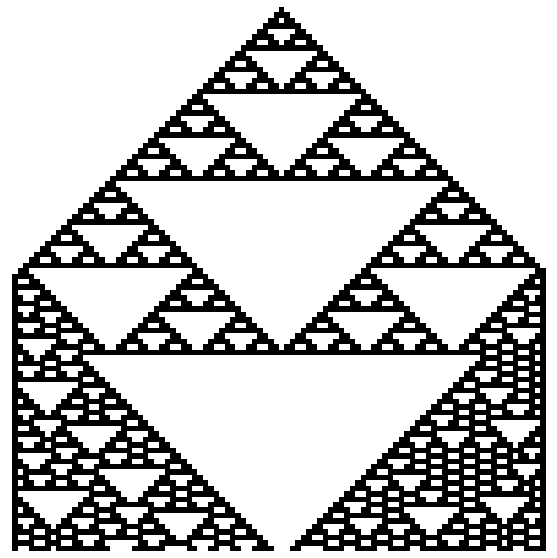

In [4]:
talk_user()

# **Segmentación de Imagenes**

In [17]:
class ImageSegment(): #clase para detectar los bordes de una imagen
    def __init__(self, imagen, R, G, B): #parámetros iniciales
        self.img = plt.imread(imagen) #ruta de la imagen que se quiera analizar
        self.R = R # valor de R (Red)
        self.G = G #valor de G (Green)
        self.B = B # valor de B (Blue)
        self.row = len(self.img) # las filas de la autómata será la cantidad de fila que tenga la imagen (el alto)
        self.column = len(self.img[0]) # las columnas de la autómatas será la cantidad de columna que tenga la imagen (el ancho)
        self.bordes = np.zeros((self.row, self.column)) #en esta variable se guardará los bordes, (serán los valores con 1)        

    def imagen(self): #Esta función muestra la imagen original 
        plt.figure(figsize = (10, 10))
        plt.axis('off')
        plt.imshow(self.img, cmap = 'gray')

    def draw(self, vecindad = 'propuesta'): # esta función será quien evalue cada vecindad y si pasa un cierto umbral agregata un 1 en la variable self.bordes
        if vecindad == 'propuesta': #Vecindad propuesta, hace referencia a la vecindad de 4 celdas que sugiere el pdf Image_semegtation
            for y in range(1, self.row - 1): # No considero el primer ni en último elemento de la fila, porque será evaluado cuando analise la celda adyacente
                for x in range(self.column - 1): # No considero el ultimo elemento de la columna, porque será evaluado cuando analise la celda adyacente
                        
                    '''
                    A continuación defino las coordenadas de las celdas vecinas a mi celda de estudio, estoy considerando 
                    las cuatro celdas adyacentes de la vecindad porpuesta en la imagen 4 del pdf
                    '''
                    #Estas 4 coordenadas contiene la información R
                    centralR = int(self.img[y][x][0])   # celda central
                    sup_izqR = int(self.img[y-1][x-1][0]) # celda superior izquierda de la  celda de estudio
                    sup_cenR = int(self.img[y-1][x][0]) # celda superior de la celda de estudio
                    sup_derR = int(self.img[y-1][x+1][0]) # celda superior derecha de la celda de estudio
                    izqR = int(self.img[y][x-1][0]) # celda a la izquierda de la celda de estudio
                    
                    #Repito lo mismo para los otros colores 

                    #Para R
                    centralG = int(self.img[y][x][1])
                    sup_izqG = int(self.img[y-1][x-1][1])
                    sup_cenG = int(self.img[y-1][x][1])
                    sup_derG = int(self.img[y-1][x+1][1])
                    izqG = int(self.img[y][x-1][1])

                    #Para G
                    centralB = int(self.img[y][x][2])
                    sup_izqB = int(self.img[y-1][x-1][2])
                    sup_cenB = int(self.img[y-1][x][2])
                    sup_derB = int(self.img[y-1][x+1][2])
                    izqB = int(self.img[y][x-1][2])

                #Ahora evaluo la diferencia de los colores, si una diferencia excede el valor de RGB escogido en los parámetros iniciales de la clase, se colocará un cero en la celda de estudio y esto se guardará en la variable self.bordes
                    if abs(centralR - sup_izqR) >= self.R or abs(centralR - sup_cenR) >= self.R or abs(centralR - sup_derR) >= self.R or abs(centralR - izqR) >= self.R or abs(centralG - sup_izqG) >= self.G or abs(centralG - sup_cenG) >= self.G or abs(centralG - sup_derG) >= self.G or abs(centralG - izqG) >= self.G or abs(centralB - sup_izqB) >= self.B or abs(centralB - sup_cenB) >= self.B or abs(centralB - sup_derB) >= self.B or abs(centralB - izqB) >= self.B:
                        self.bordes[y][x] = 0
                    #De lo contrario se colocará un 1 en la posición de la celda de estudio, esta información se guardará en la variable self.bordes
                    else:
                        self.bordes[y][x] = 1
            #Uso matplotlib para mostrar la imagen al usuario
            plt.figure(figsize = (10,10))
            plt.axis('off')
            plt.imshow(self.bordes, cmap = 'gray')

        #Repito el procedimiento para las otras dos vecindades que muestra el pdf image_segmentation
        elif vecindad == 'clasica-4':
            for y in range(1, self.row - 1):
                for x in range(self.column - 1):
                    #Para R

                    centralR = int(self.img[y][x][0]) #Celda central
                    izqR = int(self.img[y][x-1][0]) # Celda de la izquierda
                    derR = int(self.img[y][x+1][0]) # celda de la derecha
                    arrR = int(self.img[y-1][x][0]) # celda de arriba
                    abajR = int(self.img[y+1][x][0]) # celda de abajo
                    
                    #Para G
                    centralG = int(self.img[y][x][1])
                    izqG = int(self.img[y][x-1][1])
                    derG = int(self.img[y][x+1][1])
                    arrG = int(self.img[y-1][x][1])
                    abajG = int(self.img[y+1][x][1])

                    #Para B
                    centralB = int(self.img[y][x][2])
                    izqB = int(self.img[y][x-1][2])
                    derB = int(self.img[y][x+1][2])
                    arrB = int(self.img[y-1][x][2])
                    abajB = int(self.img[y+1][x][2])

            #Se evalua la diferencia entre colores
            #Igual excede el umbral definido en los parámetros se colocará un cero, de lo contrario se coloca un 1
                    if abs(centralR - izqR) >= self.R or abs(centralR - derR) >= self.R or abs(centralR - arrR) >= self.R or abs(centralR - abajR) >= self.R or abs(centralG - izqG) >= self.G or abs(centralG - derG) >= self.G or abs(centralG - arrG) >= self.G or abs(centralG - abajG) >= self.G or abs(centralB - izqB) >= self.B or abs(centralB - derB) >= self.B or abs(centralB - arrB) >= self.B or abs(centralB - abajB) >= self.B:
                        self.bordes[y][x] = 0

                    else:
                        self.bordes[y][x] = 1
            #Muestro la imagen
            plt.figure(figsize = (10,10))
            plt.axis('off')
            plt.imshow(self.bordes, cmap = 'gray')
        
        #Tercera vecindad mostrada en el pdf image_segmentation
        #En este caso tengo 8 celdas vecinas de mi celda central (celda de estudio)
        elif vecindad == 'clasica-8':
            for y in range(1, self.row - 1):
                for x in range(self.column - 1):
                #Para R

                    centralR = int(self.img[y][x][0]) # celda central
                    izqR = int(self.img[y][x-1][0]) # celda de la izquierda
                    sup_izqR = int(self.img[y-1][x-1][0]) # celda superior izquierda
                    inf_izqR = int(self.img[y+1][x-1][0]) # celda inferior izquierda
                    derR = int(self.img[y][x+1][0]) # celda de la derecha
                    sup_derR = int(self.img[y-1][x+1][0]) # celda superior derecha
                    inf_derR = int(self.img[y+1][x+1][0])  # celda inferionr derecha
                    arrR = int(self.img[y-1][x][0]) #celda de arriba
                    abajR = int(self.img[y+1][x][0]) #celda de abajo
                    
                    #Para G
                    centralG = int(self.img[y][x][1])
                    izqG = int(self.img[y][x-1][1])
                    sup_izqG = int(self.img[y-1][x-1][1])
                    inf_izqG = int(self.img[y+1][x-1][1])
                    derG = int(self.img[y][x+1][0])
                    sup_derG = int(self.img[y-1][x+1][1])
                    inf_derG = int(self.img[y+1][x+1][1]) 
                    arrG = int(self.img[y-1][x][1])
                    abajG = int(self.img[y+1][x][1])
                    
                    #Para B
                    centralB = int(self.img[y][x][2])
                    izqB = int(self.img[y][x-1][2])
                    sup_izqB = int(self.img[y-1][x-1][2])
                    inf_izqB = int(self.img[y+1][x-1][2])
                    derB = int(self.img[y][x+1][2])
                    sup_derB = int(self.img[y-1][x+1][2])
                    inf_derB = int(self.img[y+1][x+1][2]) 
                    arrB = int(self.img[y-1][x][2])
                    abajB = int(self.img[y+1][x][2])
                
                #Evaluo la diferencia, si una diferencia excede el umbral, se coloca un 0
                    if abs(centralR - izqR) >= self.R or abs(centralR - sup_izqR) >= self.R or abs(centralR - inf_izqR) >= self.R or abs(centralR - derR) >= self.R or abs(centralR - sup_derR) >= self.R or abs(centralR - inf_derR) >= self.R or abs(centralR - arrR) >= self.R or abs(centralR - abajR) >= self.R or abs(centralG - izqG) >= self.G or abs(centralG - sup_izqG) >= self.G or abs(centralG - inf_izqG) >= self.G or abs(centralG - derG) >= self.G or abs(centralG - sup_derG) >= self.G or abs(centralG - inf_derG) >= self.G or abs(centralG - arrG) >= self.G or abs(centralG - abajG) >= self.G or abs(centralB - izqB) >= self.B or abs(centralB - sup_izqB) >= self.B or abs(centralB - inf_izqB) >= self.B or abs(centralB - derB) >= self.B or abs(centralB - sup_derB) >= self.B or abs(centralB - inf_derB) >= self.B or abs(centralB - arrB) >= self.B or abs(centralB - abajB) >= self.B:
                        self.bordes[y][x] = 0
                    #En caso contrario se coloca un 1
                    else:
                        self.bordes[y][x] = 1
            #Uso matplotlib para mostrar la imagen

            plt.figure(figsize = (10,10))
            plt.axis('off')
            
            plt.imshow(self.bordes, cmap = 'gray')

Ahora utilizaré la clase ImagenSegment para detectar los bordes de las imagenes que aparecé en el pdf. 

Utilizaré Otros valores para los umbrales RGB porque al guardar la imagen como un capture de pantalla los valores de los pixeles cambiaron 

In [24]:
#Utilizaré esta función para tener el valor promedio de RGB, lo tomaré como punto de partida y luego cambiaré los valores para tener los bordes de la imagen
def fit(img):
    dato = plt.imread(img)
            #Este es el promedio de R      #Este es el primedio de G         Este es el primedio de B  
    return np.round(np.mean(dato[:, :, 0])), np.round(np.mean(dato[:, :, 1])), np.round(np.mean(dato[:, :, 2]))

fit('/content/bateador.png')

(1.0, 1.0, 1.0)

## Circulos de colores

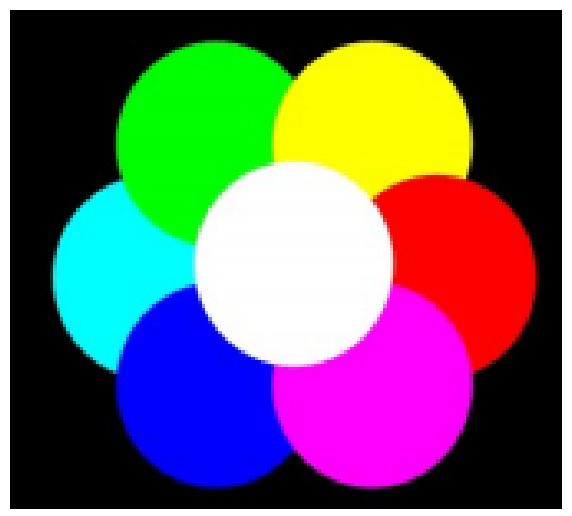

In [18]:
ImageSegment('/content/circulos de colores.png', 40, 40, 40).imagen()

In [26]:
fit('/content/circulos de colores.png')

(0.0, 0.0, 0.0)

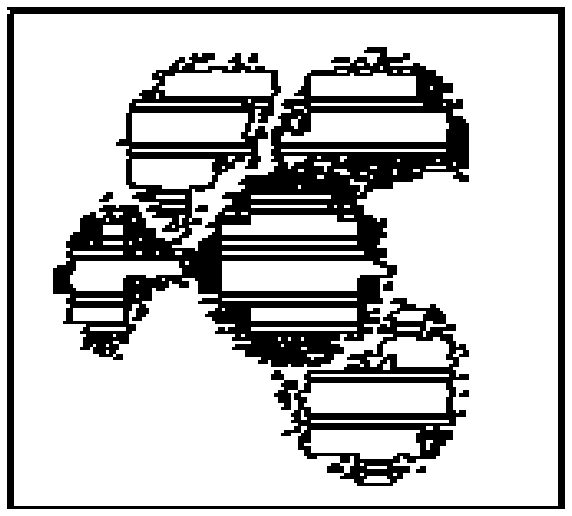

In [29]:
ImageSegment('/content/circulos de colores.png', 0.5, 0.4, 0.5).draw('propuesta')

## Bateador

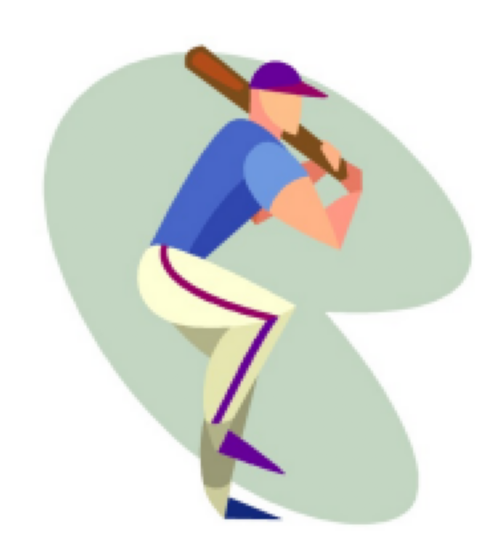

In [31]:
ImageSegment('/content/bateador.png', 1, 1, 1).imagen()

In [32]:
fit('/content/bateador.png')

(1.0, 1.0, 1.0)

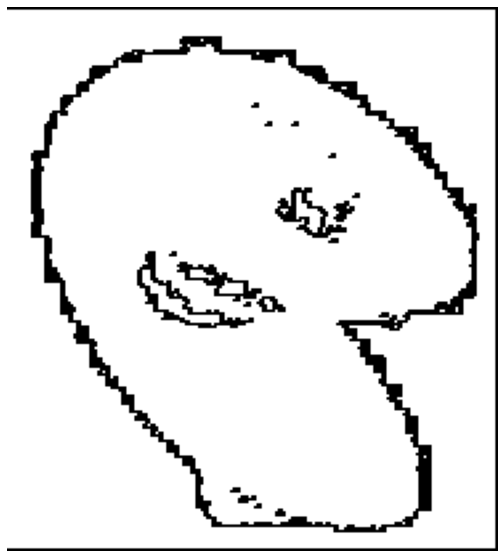

In [34]:
ImageSegment('/content/bateador.png', 0.1, 0.1, 0.1).draw('propuesta')

## Colores

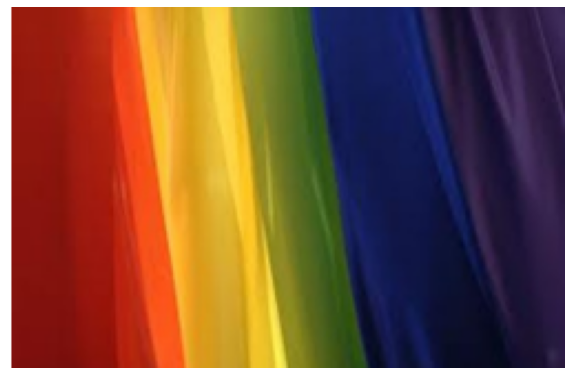

In [35]:
ImageSegment('/content/colores.png',10,10,10).imagen()

In [37]:
fit('/content/colores.png')

(0.0, 0.0, 0.0)

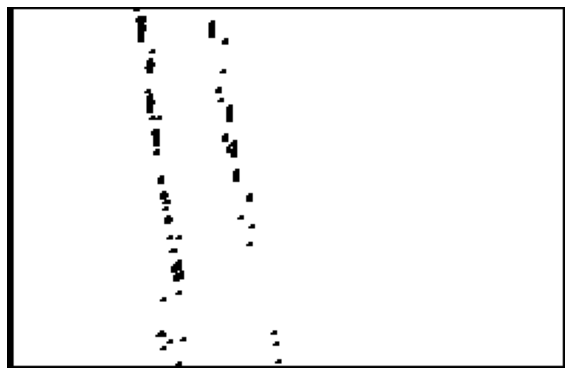

In [38]:
ImageSegment('/content/colores.png', 0.1,0.1,0.1).draw('propuesta')

## engranage sólido

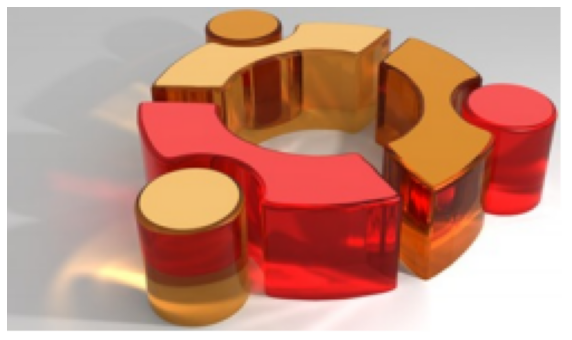

In [39]:
ImageSegment('/content/engranage de solido.png',10,10,10).imagen()

In [40]:
fit('/content/engranage de solido.png')

(1.0, 1.0, 0.0)

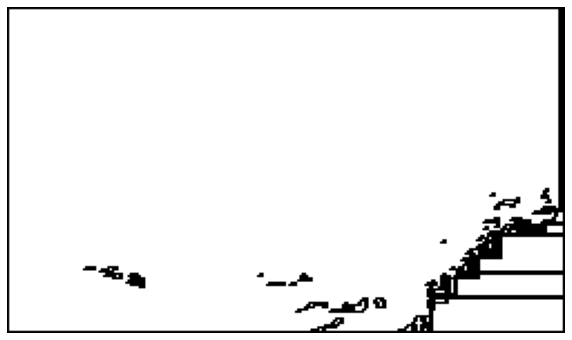

In [42]:
ImageSegment('/content/engranage de solido.png', 0.3, 0.3, 0.1).draw('propuesta')